# Going multivariate...

## Principal Component Analysis (PCA)

There are many packages in R for performing PCA. We will show use some examples using factoMineR and factoextra. 
You can find a nice guide here:
- http://www.sthda.com/english/wiki/ade4-and-factoextra-principal-component-analysis-r-software-and-data-mining
- http://www.sthda.com/english/wiki/fviz-pca-quick-principal-component-analysis-data-visualization-r-software-and-data-mining
-http://www.sthda.com/english/wiki/factoextra-r-package-easy-multivariate-data-analyses-and-elegant-visualization

*Warning*: In the "facto" language the focus is shifted onto *individuals* and *variables* completely ignoring the theorical concepts of *scores* and *loadings*.


In [1]:
#loading the required libraries
suppressPackageStartupMessages(library(FactoMineR))
suppressPackageStartupMessages(library(factoextra))

#loading the data
load("data/winesmall.RData")

#performing the PCA on all the "numerical" variables
res.pca<-PCA(winesmall[,-1], 
             scale.unit = TRUE,
             graph = FALSE)

How can we decide how many components it is worth to look at?

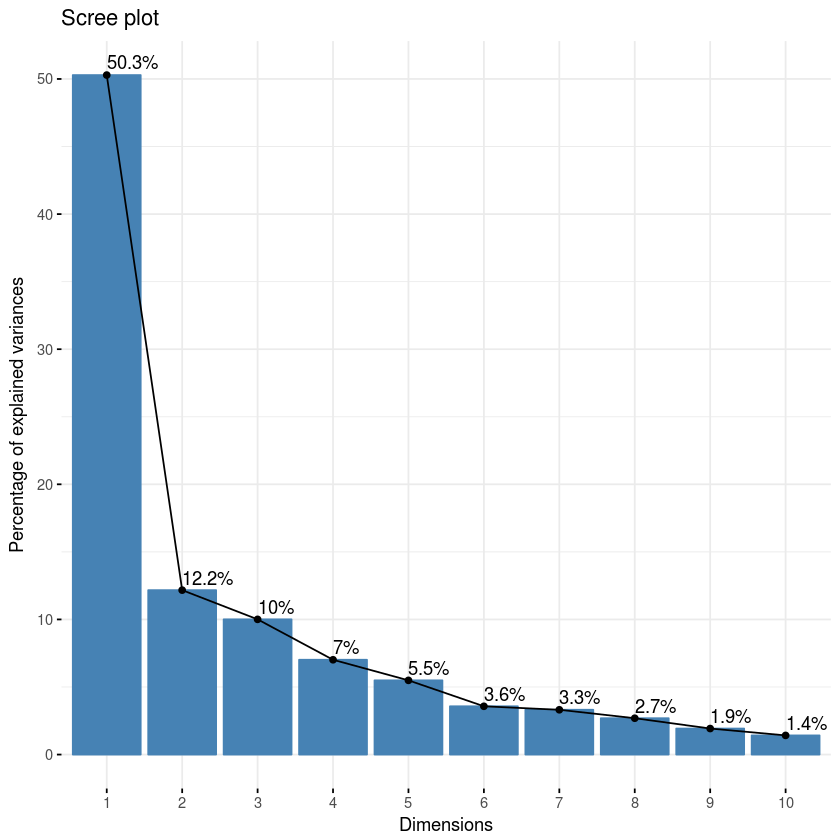

In [2]:
fviz_screeplot(res.pca, addlabels = TRUE)

**Score plot**: let's look at the projected points. 

In [3]:
ind <- get_pca_ind(res.pca)
head(ind$coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
1,3.628388,0.6881256,0.16770821,-1.10063377,0.4575120
2,2.361970,-2.6483470,-0.45921113,-0.59264239,-0.3917221
3,2.576100,0.8683296,0.01560177,0.60591967,-0.3769289
4,3.917840,1.0396550,1.50103347,-0.47104022,0.3215605
5,1.204224,2.0487614,-1.76689257,0.33127430,0.1501097
6,3.419391,0.3543725,0.96510929,-0.01095914,-0.1046296


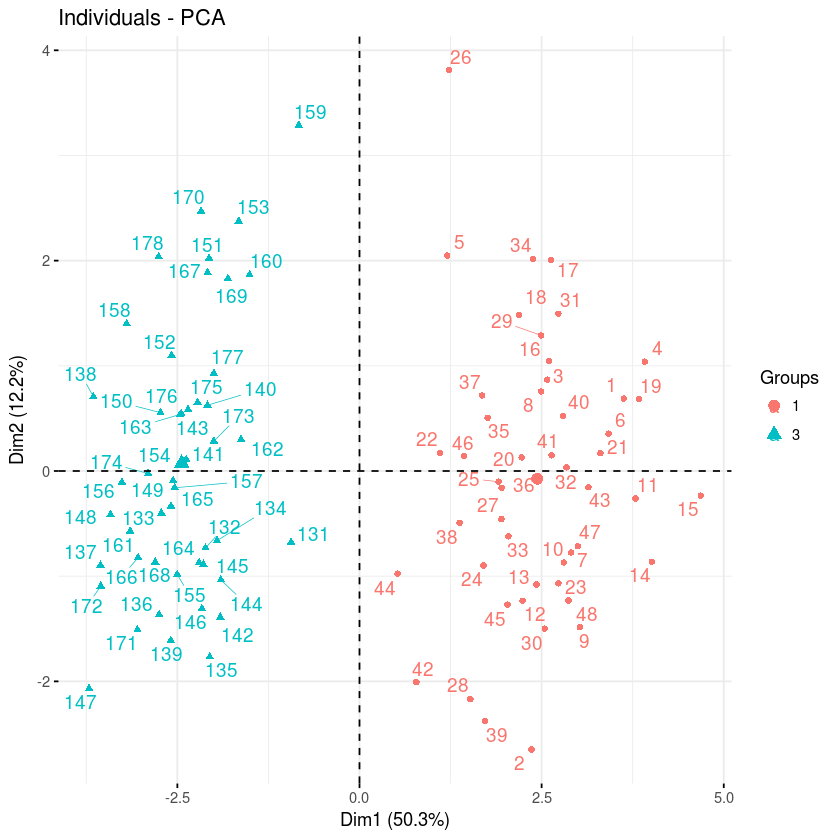

In [4]:
fviz_pca_ind(res.pca, 
             habillage = winesmall$Cultivar,
             #label = "none", # hide individual labels
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

**Loading plot**: which are the variable that are contributing to the projection?

In [5]:
var <- get_pca_var(res.pca)
head(var$coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Alcohol,0.62478731,0.15442800,0.45386696,0.13351638,0.39305070
Malic_acid,-0.64830841,-0.01428569,-0.01116269,0.06478528,0.69800826
Ash,0.05231947,0.83675750,-0.36296608,0.26249664,0.01465538
Ash_Alcalinity,-0.70015936,0.54014874,-0.13948923,0.10901023,-0.04921609
Magnesium,0.36284104,0.54786924,-0.24674743,-0.58038932,0.07650371
Total_Phenols,0.90427423,0.16827354,0.11218225,0.13470019,0.01836421


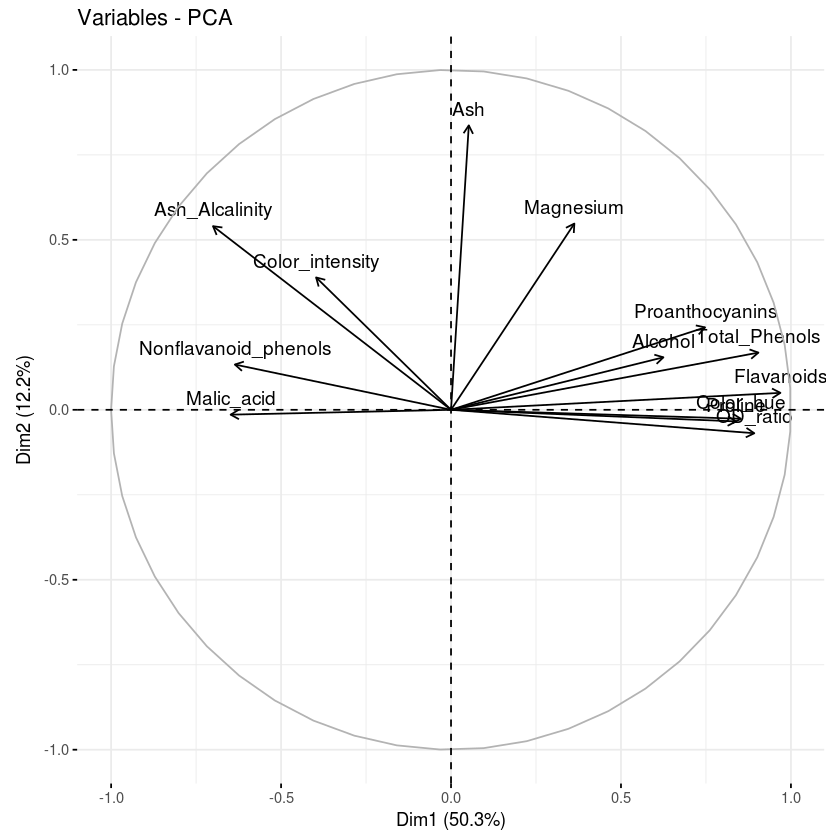

In [6]:
fviz_pca_var(res.pca, col.var = "black")

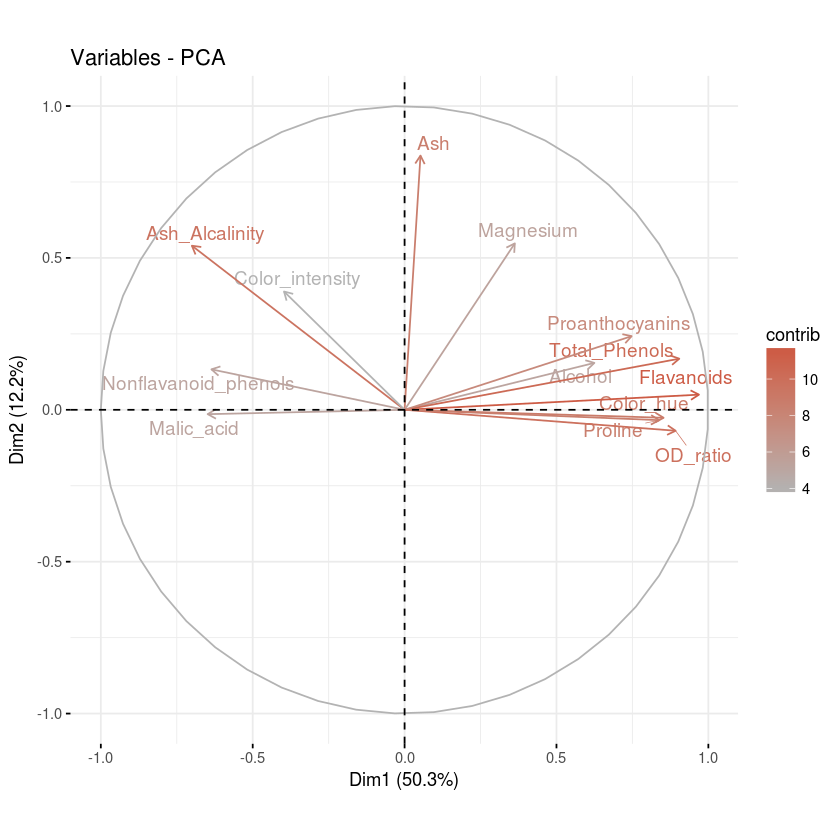

In [7]:
#you can "beautify" to the plot
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("gray70", "coral3"),
             repel = TRUE # Avoid text overlapping
             )

**Biplot**: putting samples and variables in the same visualization

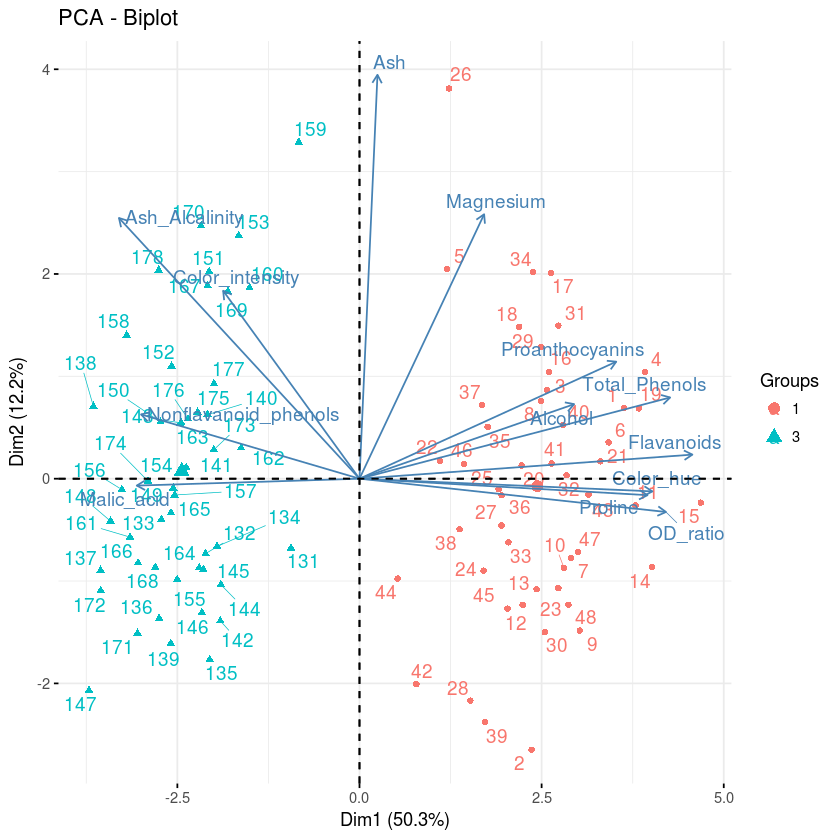

In [8]:
fviz_pca_biplot(res.pca, 
                habillage = winesmall$Cultivar,
                #label = "none", # hide individual labels
                repel = TRUE)

### Exercise:
##### Which is the effect of scaling?

### Exercise:
##### Perform a PCA on the RUBUS dataset.

Assume that you perform and experiment and after the analysis is done you receive a few extra samples. 
How could you compare the new data with the old one? You can use a PCA, but how?

In [9]:
rubus<-read.table("data/rubusSmallInfo.txt",header=TRUE, check.names = FALSE,sep="\t")
#str(rubusFilled)
rubus[1:5,1:10]
summary(rubus[,1:9])

sampleName,color,location,year,variety,variety.name,temperature,59/895.6,59/2153.3,73/296.2
Ab_11_DR_R_20_1601,R,DR,2011,Ab,Autumn Bliss,-20,2.743718,2.213392,1.227496
Ab_11_VG_R_16_2701,R,VG,2011,Ab,Autumn Bliss,-80,2.766302,1.818145,1.231253
AG_11_BP_Y_01_0801,Y,BP,2011,AG,Alpen Gold,-80,2.854527,2.388704,1.053286
AG_11_SM_Y_28_1301,Y,SM,2011,AG,Alpen Gold,-80,2.868495,3.094968,1.432673
AG_12_BP_Y_02_2901,Y,BP,2012,AG,Alpen Gold,-20,2.866891,2.338042,1.658370


              sampleName color  location      year         variety 
 Ab_11_DR_R_20_1601: 1   R:13   BP:12    Min.   :2010   Tu     :4  
 Ab_11_VG_R_16_2701: 1   Y:12   DR: 3    1st Qu.:2010   AG     :3  
 AG_11_BP_Y_01_0801: 1          SM: 1    Median :2011   SG     :3  
 AG_11_SM_Y_28_1301: 1          VG: 9    Mean   :2011   SR     :3  
 AG_12_BP_Y_02_2901: 1                   3rd Qu.:2011   Ab     :2  
 An_10_VG_Y_03_0101: 1                   Max.   :2012   An     :2  
 (Other)           :19                                  (Other):8  
        variety.name  temperature       59/895.6       59/2153.3    
 Tulameen     :4     Min.   :-80.0   Min.   :2.601   Min.   :1.696  
 Alpen Gold   :3     1st Qu.:-80.0   1st Qu.:2.704   1st Qu.:1.956  
 Sugana Giallo:3     Median :-80.0   Median :2.748   Median :2.164  
 Sugana Red   :3     Mean   :-53.6   Mean   :2.765   Mean   :2.203  
 Anne         :2     3rd Qu.:-20.0   3rd Qu.:2.855   3rd Qu.:2.338  
 Autumn Bliss :2     Max.   :-20.0   Max. 

In [10]:
## how to add extra point... scaling: the tricky part...
summary(rubus$color)

idr<-which(rubus$color=="R")
idy<-which(rubus$color=="Y")

#let's keep 9 sample per class and assume that this is your primary dataset 
sel<-c(idr[1:9],idy[1:9])
#after your analysis is done, you receive a few samples more:  
#now you want to understand how similar they are to your original data 
extra<-c(idr[10:13],idy[10:12])

res.pca<-PCA(rubus[,-1],
             ind.sup = extra,
             scale.unit = TRUE,
             quali.sup = 1:6)

summary(res.pca)

R  Y 
13 12


Call:
PCA(X = rubus[, -1], scale.unit = TRUE, ind.sup = extra, quali.sup = 1:6) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance             187.650  75.441  36.058  26.397  25.069  20.996  18.952
% of var.             37.530  15.088   7.212   5.279   5.014   4.199   3.790
Cumulative % of var.  37.530  52.618  59.830  65.109  70.123  74.322  78.113
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance              17.292  15.250  14.784  11.985  11.551  10.701   9.254
% of var.              3.458   3.050   2.957   2.397   2.310   2.140   1.851
Cumulative % of var.  81.571  84.621  87.578  89.975  92.285  94.425  96.276
                      Dim.15  Dim.16  Dim.17
Variance               7.236   5.839   5.546
% of var.              1.447   1.168   1.109
Cumulative % of var.  97.723  98.891 100.000

Individuals (the 10 first)
                   Dist     Dim.1     ctr    cos2     Dim.2     ctr    cos2  
1 

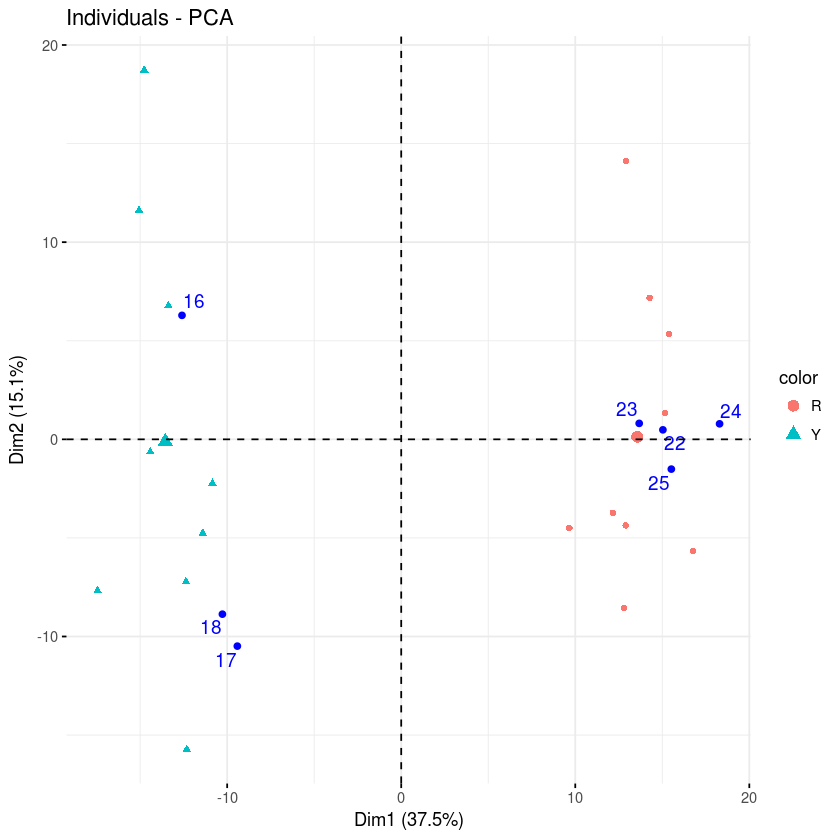

In [11]:
fviz_pca_ind(res.pca, 
                habillage = grep("color",names(rubus))-1, #other confounding factors can be checked
                label = "none", # hide individual labels
                repel = TRUE)

## Clustering: k-means

Credits: https://www.r-statistics.com/2013/08/k-means-clustering-from-r-in-action/

In [12]:
#we will use k-means.. 
#let's start looking at what the function does
?kmeans

In [13]:
set.seed(20)
cl <- kmeans(winesmall[, -1], centers =  2, nstart = 20)
cl

K-means clustering with 2 clusters of sizes 61, 35

Cluster means:
   Alcohol Malic_acid      Ash Ash_Alcalinity Magnesium Total_Phenols
1 13.22131   3.144262 2.466066       20.70656  101.9836      1.912951
2 13.85086   1.930571 2.423714       16.75714  103.8571      2.817714
  Flavanoids Nonflavanoid_phenols Proanthocyanins Color_intensity Color_hue
1   1.224426            0.4162295        1.304918        6.828197  0.755082
2   2.970000            0.2940000        1.852000        5.489714  1.082286
  OD_ratio  Proline
1 2.037049  670.082
2 3.122571 1205.200

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   2   2   2   1   2   2   2   2   2   2   2   2   2   2   2   2   2   2   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   2   2   1   1   2   2   1   2   2   2   2   2   2   1   1   2   2   1 
 41  42  43  44  45  46  47  48 131 132 133 134 135 136 137 138 139 140 141 142 
  1   2   

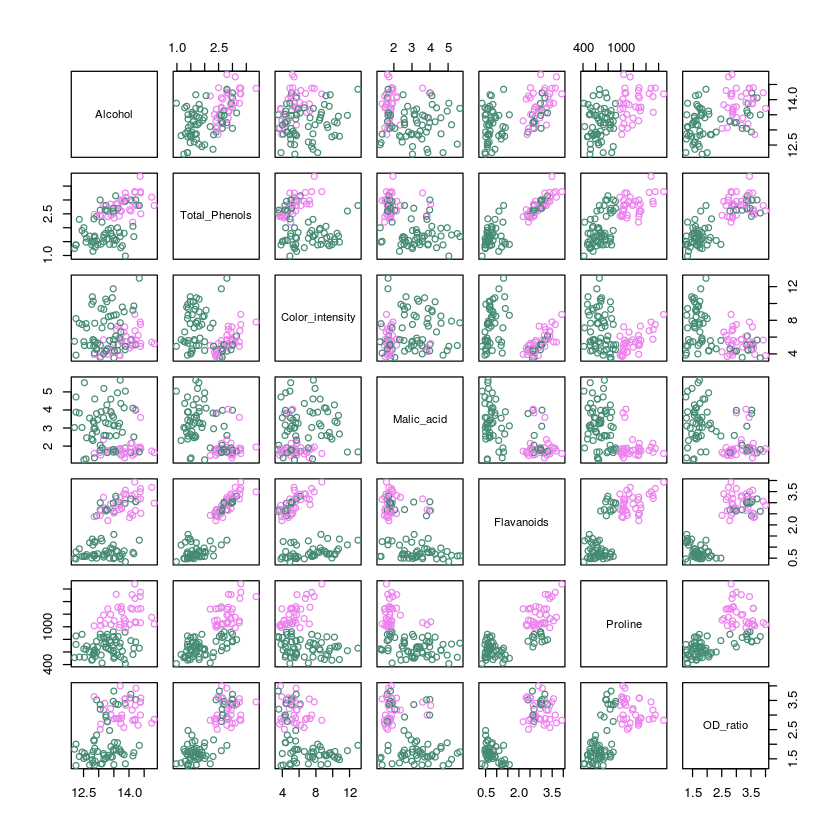

In [14]:
#Let's give a look at the output
plot(winesmall[,c("Alcohol","Total_Phenols","Color_intensity","Malic_acid","Flavanoids","Proline","OD_ratio")], 
     col=c("aquamarine4","violet")[cl$cluster])

In [15]:
#How good is the clustering?
table(winesmall$Cultivar, cl$cluster)

   
     1  2
  1 13 35
  3 48  0

In [16]:
#how can we choose the number of clusters?
#the "elbow" method
wssplot <- function(data, nc=15, seed=1234){
               wss <- (nrow(data)-1)*sum(apply(data,2,var))
               for (i in 2:nc){
                    set.seed(seed)
                    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
                plot(1:nc, wss, type="b", pch=19, xlab="Number of Clusters",
                     ylab="Within groups sum of squares")}

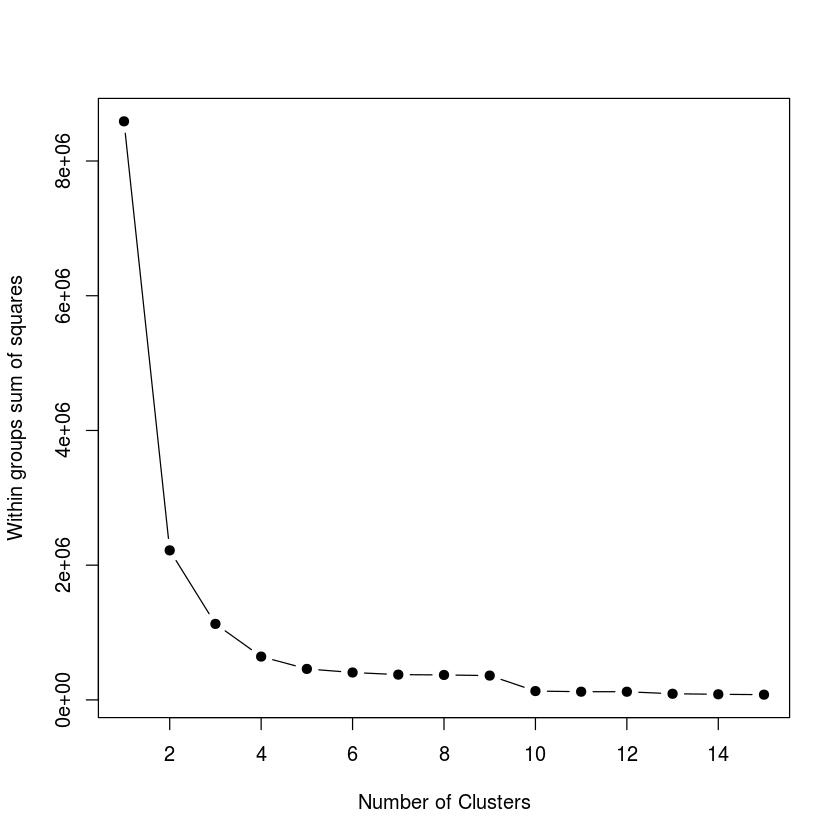

In [17]:
wssplot(winesmall[,-1])

In [18]:
#another option for choosing the number of clusters: a package with 30 indices (you can choose which distance)
library(NbClust)
?NbClust
#otherwise there is also the fpc package: check the cluster.stats function

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


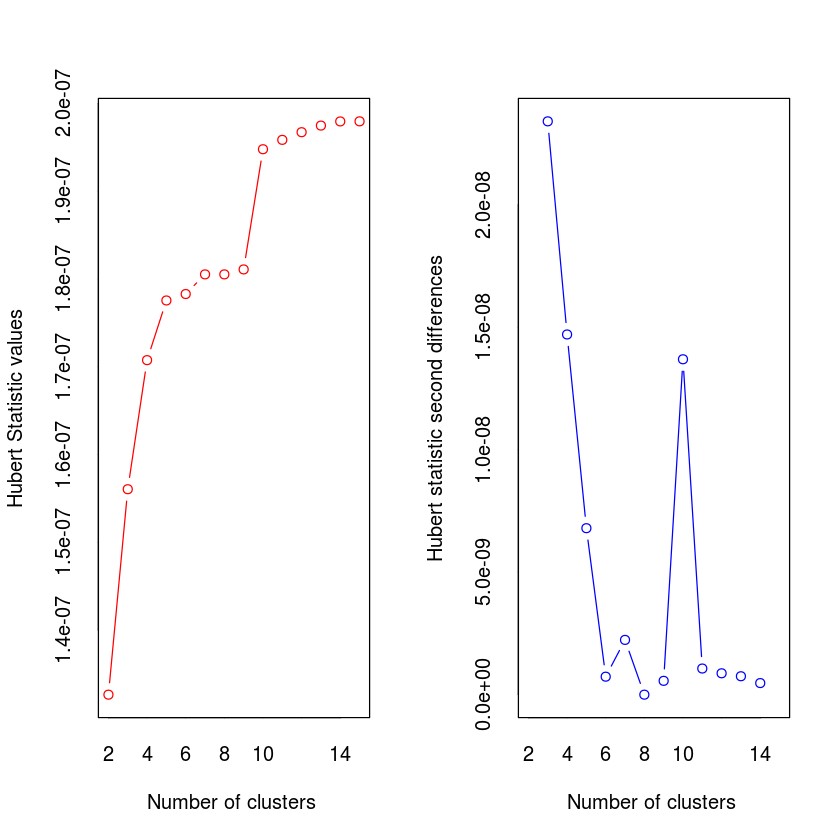

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 3 proposed 3 as the best number of clusters 
* 4 proposed 4 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 
* 4 proposed 10 as the best number of clusters 
* 1 proposed 11 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Con


 0  2  3  4  6  7  9 10 11 13 14 15 
 2  6  3  4  1  1  1  4  1  1  1  1 

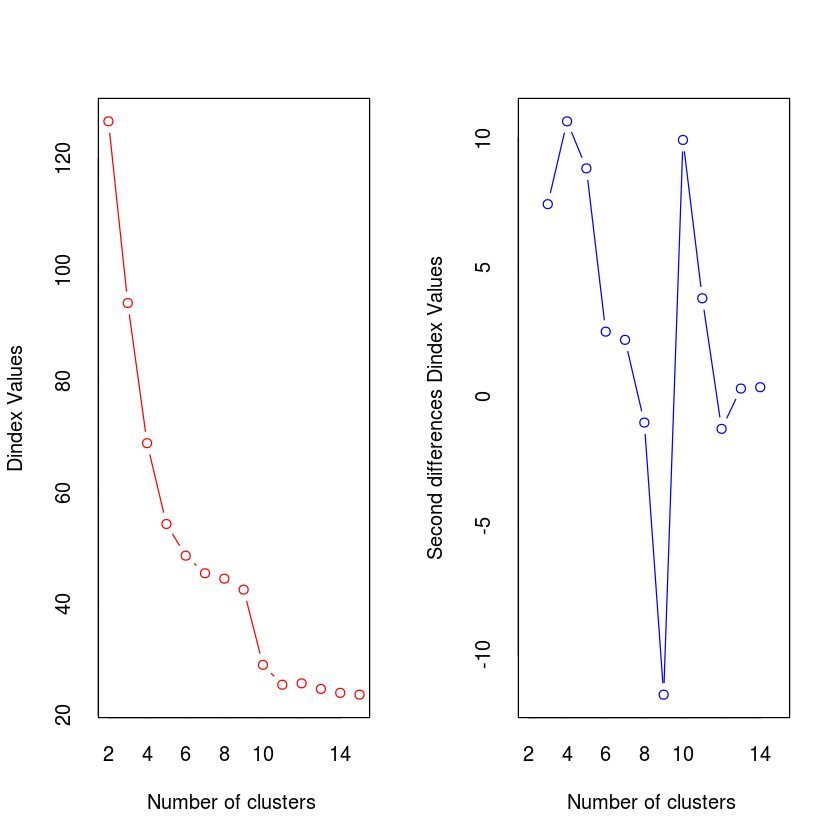

In [19]:
set.seed(1234)
nc <- NbClust(winesmall[,-1], min.nc=2, max.nc=15, method="kmeans", distance="euclidean")

#the recommended number of clusters is chosen using 26 criteria provided
table(nc$Best.n[1,])

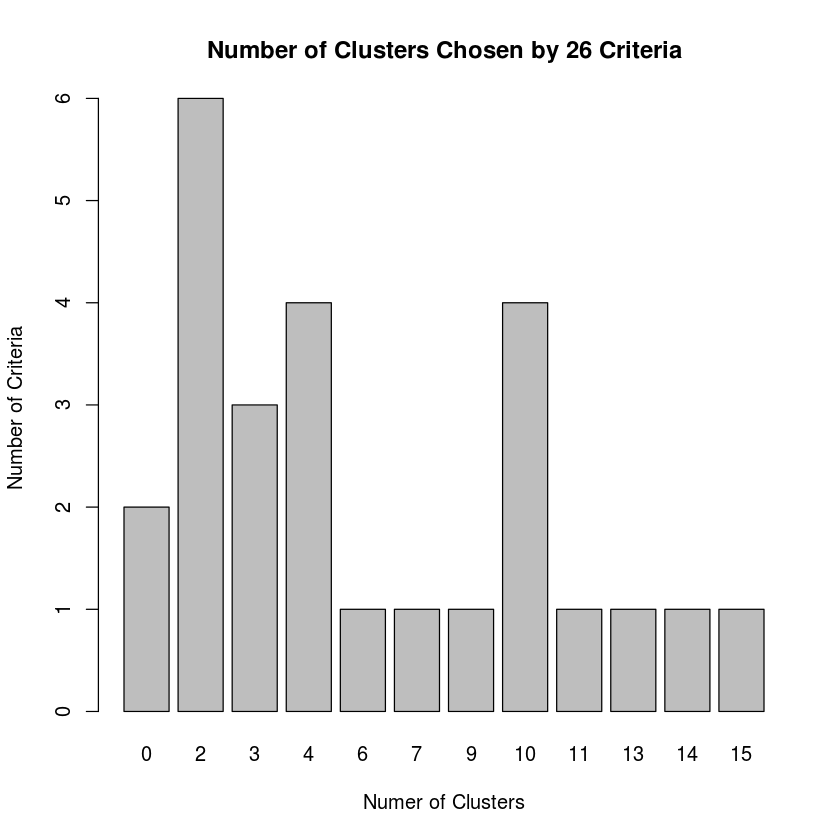

In [20]:
barplot(table(nc$Best.n[1,]),
          xlab="Numer of Clusters", ylab="Number of Criteria",
          main="Number of Clusters Chosen by 26 Criteria")

   
     1  2  3
  1 30 28  1
  2  9  0 62
  3 11  0 37

   
     1  2  3
  1 46 13  0
  2  1 20 50
  3  0 29 19

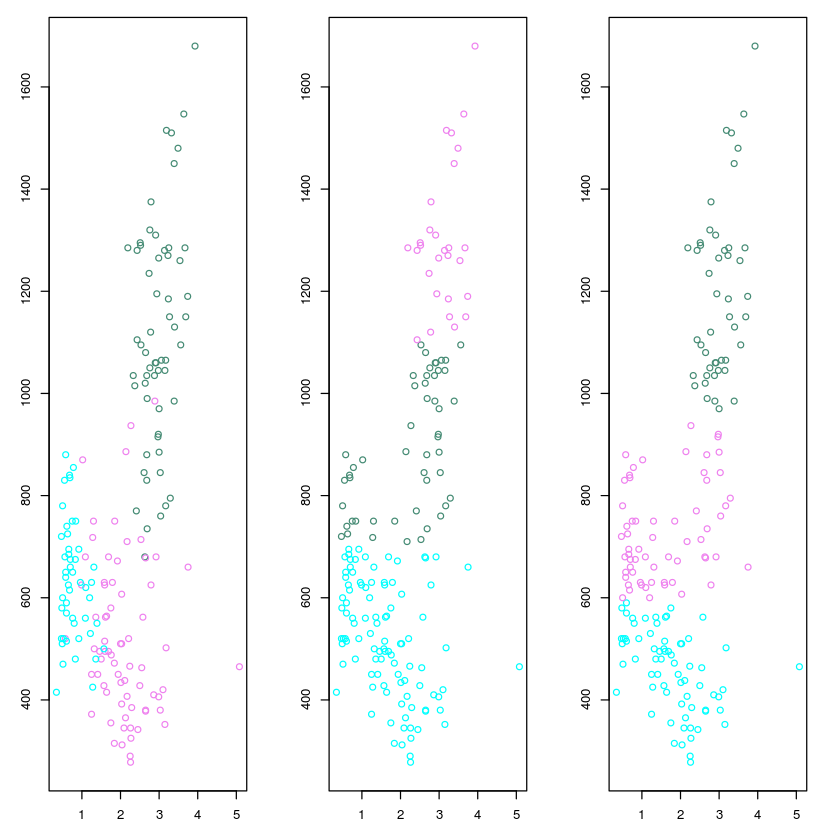

In [21]:
#now we will try to understan the meaning of the nstart parameter
#for this reason we will use the complete dataset with three classes
wine<-read.table("data//wine.data.names.txt",header=TRUE)

#the layout command is useful for putting more than one plot close together
nf <- layout(mat = matrix(c(1,2,3),1,3, byrow=TRUE), height=c(0.5))
#avoids extra space around the plot
par(mar=c(3.1, 3.1, 1.1, 2.1))

plot(wine[,c("Flavanoids","Proline")], 
     col=c("aquamarine4","violet","cyan1")[as.numeric(wine$Cultivar)])

set.seed(100)
cl <- kmeans(wine[, -1], centers =  3, nstart = 1)
table(wine$Cultivar, cl$cluster)

plot(wine[,c("Flavanoids","Proline")], 
     col=c("aquamarine4","violet","cyan1")[cl$cluster])

set.seed(100)
cl <- kmeans(wine[, -1], centers =  3, nstart = 5)
table(wine$Cultivar, cl$cluster)

plot(wine[,c("Flavanoids","Proline")], 
     col=c("aquamarine4","violet","cyan1")[cl$cluster])


### EXCERCISE:
##### Check what happens if you scale the variables.

## Clustering: hierarchical clustering

Credits:
- Quick-R: http://www.statmethods.net/advstats/cluster.html
- http://cc.oulu.fi/~jarioksa/opetus/metodi/sessio3.pdf

In [22]:
?hclust

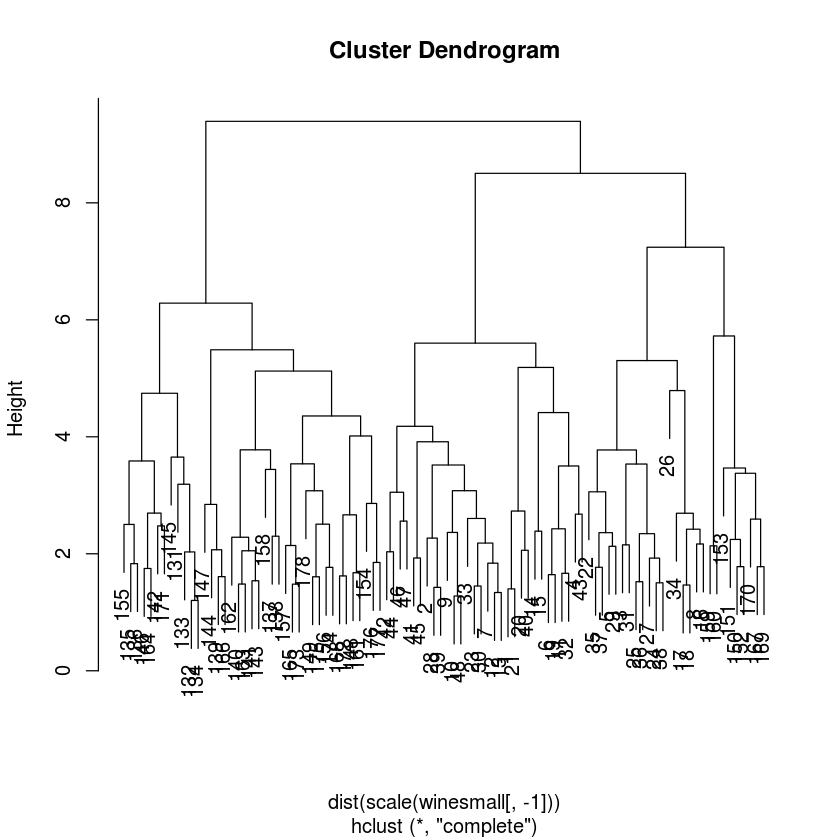

In [23]:
cl <- hclust(dist(scale(winesmall[,-1])))
plot(cl)

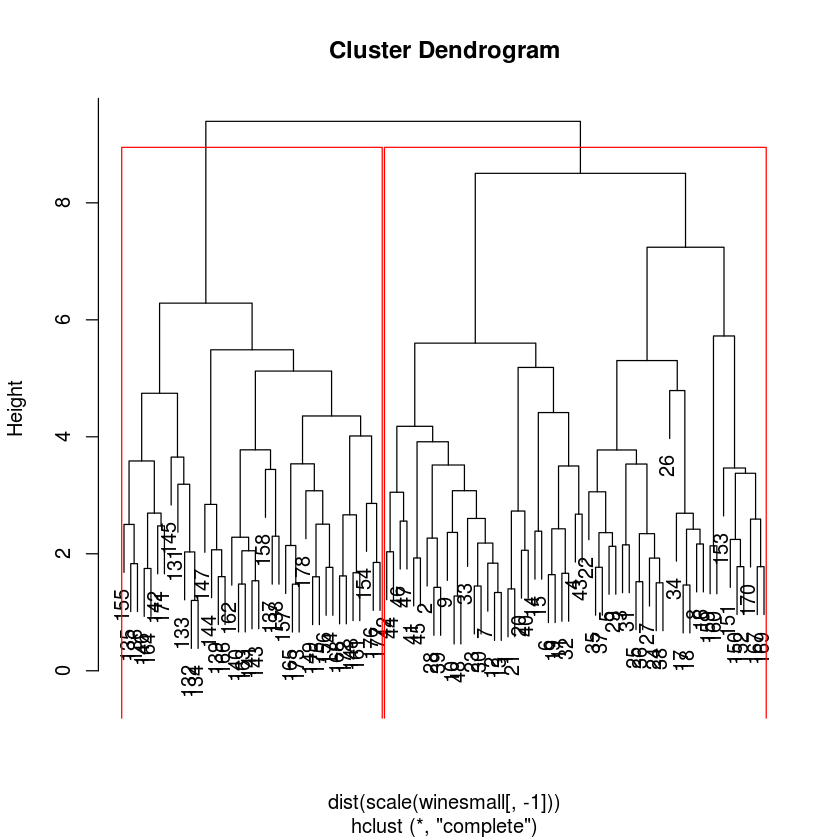

In [24]:
#how can we decide which is the best number of clusters? look at the plot
#let's cut the dendrogram in order to define th,e clusters:
plot(cl)
rect.hclust(cl, 2) #we can use here the result of k-means for cutting


#create the vector with the cluster membership information
clusterCut <- cutree(cl, 2)

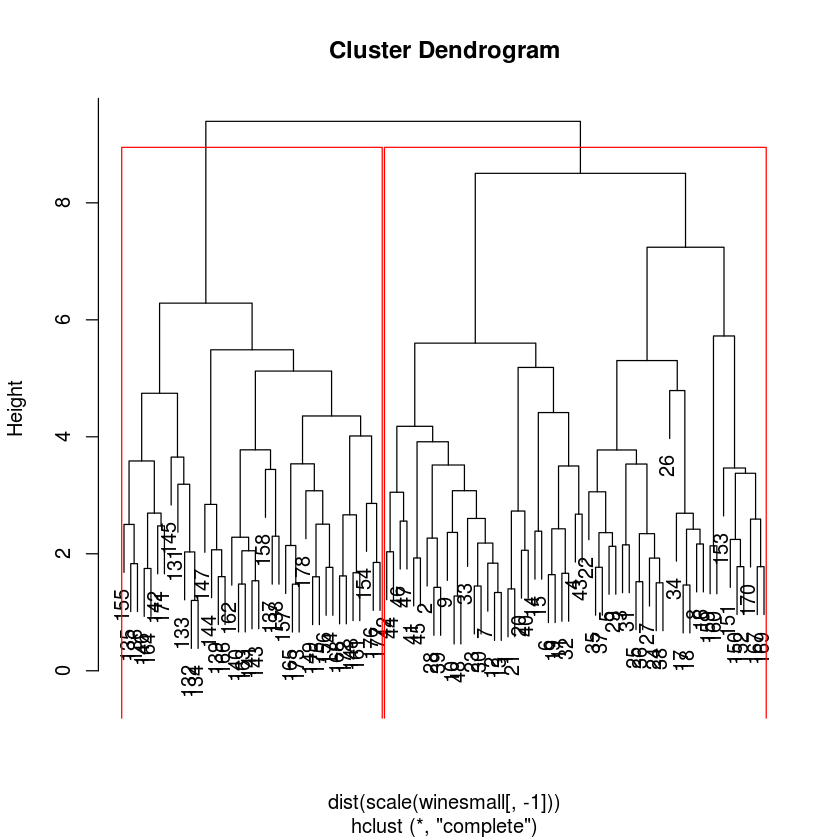

In [25]:
#we can use the distance for cutting the dendrogram
plot(cl)
rect.hclust(cl, h=9) 

In [26]:
#in this special case we have the info about the class... 
#we can check how it compares with the structure detected by hclust

table(clusterCut,winesmall$Cultivar)

          
clusterCut  1  3
         1 48  9
         2  0 39

### EXCERCISE:
##### The hclust function in R uses the complete linkage method for hierarchical clustering by default. This particular clustering method defines the cluster distance between two clusters to be the maximum distance between their individual components. At every stage of the clustering process, the two nearest clusters are merged into a new cluster. The process is repeated until the whole data set is agglomerated into one single cluster. Explore what changes when you change the method parameter of the hierarchial clustering. Check in the help page which are the alternatives.

##### The dist function allows the computation of a distance matrix. You should choose the most appropriate to your needs. Start giving a look what happens if you change it.

### EXCERCISE:
##### Explore the RUBUS dataset with the presented clustering techniques.